In [172]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
import scipy.io
from PIL import Image
import cv2

#!pip install scikit-image
from skimage import color
from skimage import io

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})


(825, 800, 3)

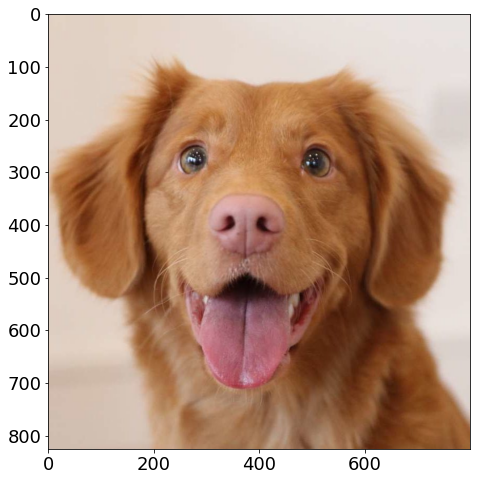

In [173]:
img0 = io.imread('image2.jpg')
img1 = img0
#img1 = color.rgb2gray(img0).astype(float)

plt.imshow(img1)
np.shape(img1)

In [174]:
def enhance(X, reps):

    Y = np.repeat(X, repeats= reps, axis=0)
    Z = np.repeat(Y, repeats= reps, axis=1)
    return(Z)

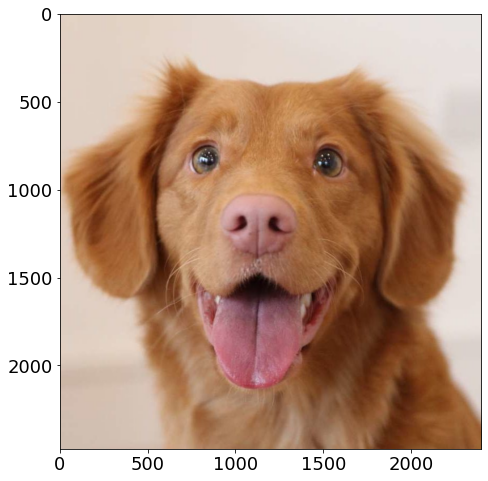

In [175]:
P = enhance(img1,3)
plt.imshow(P)

In [176]:
# Define randomized SVD function
def rSVD(X, r, q, p):
    # Step 1: Sample column space of X with P matrix
    ny = X.shape[1]
    P = np.random.randn(ny, r+p)
    Z = X @ P
    for k in range(q):
        Z = X @ (X.T @ Z)

    Q, R = np.linalg.qr(Z, mode='reduced')

    # Step 2: Compute SVD on projected Y = Q.T @ X
    Y = Q.T @ X
    UY, S, VT = np.linalg.svd(Y, full_matrices=0)
    U = Q @ UY

    return U, S, VT

In [177]:
A = img0
X = np.mean(A, axis=2)  # Convert RGB -> grayscale

r = 250  # Target rank
q = 1   # Power iterations
p = 5   # Oversampling parameter

rU, rS, rVT = rSVD(X, r, q, p)


In [178]:
## Reconstruction
XrSVD = rU[:, :(r+1)] @ np.diag(rS[:(r+1)]
                                ) @ rVT[:(r+1), :]  # SVD approximation
errSVD = np.linalg.norm(X-XrSVD, ord=2) / np.linalg.norm(X, ord=2)


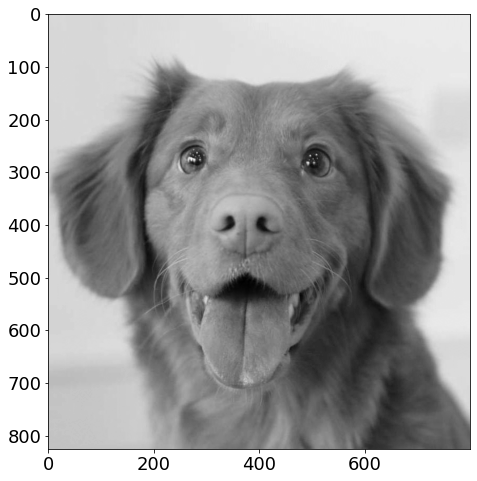

In [179]:
plt.set_cmap('gray')
plt.imshow(XrSVD)

In [180]:
im = Image.open('image2.jpg')
im1 = Image.Image.split(im)

im1_red = np.asmatrix(im1[0])
im1_green = np.asmatrix(im1[1])
im1_blue = np.asmatrix(im1[2])


In [181]:
A = img0
X = np.mean(A, axis=2)  # Convert RGB -> grayscale

r = 250  # Target rank
q = 1   # Power iterations
p = 5   # Oversampling parameter

rU1, rS1, rVT1 = rSVD(im1_red, r, q, p)
rU2, rS2, rVT2 = rSVD(im1_green, r, q, p)
rU3, rS3, rVT3 = rSVD(im1_blue, r, q, p)

XrSVD1 = rU1[:, :(r+1)] @ np.diag(rS1[:(r+1)]
                                ) @ rVT1[:(r+1), :]

XrSVD2 = rU2[:, :(r+1)] @ np.diag(rS2[:(r+1)]
                                ) @ rVT2[:(r+1), :]

XrSVD3 = rU3[:, :(r+1)] @ np.diag(rS3[:(r+1)]
                                  ) @ rVT3[:(r+1), :]


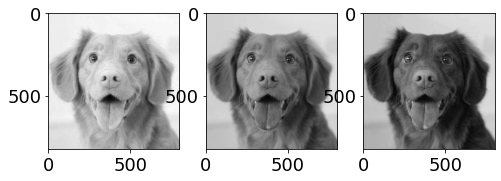

In [182]:
fig, axs = plt.subplots(1, 3)

plt.set_cmap('gray')
axs[0].imshow(XrSVD1)
axs[1].imshow(XrSVD2)
axs[2].imshow(XrSVD3)

plt.show()


In [183]:
type(XrSVD1)

numpy.matrix

In [184]:
XrSVD1_im = Image.fromarray(XrSVD1)
XrSVD2_im = Image.fromarray(XrSVD2)
XrSVD3_im = Image.fromarray(XrSVD3, 'RGB')

rgb = Image.merge("RGB", (XrSVD1_im, XrSVD2_im, XrSVD3_im))
plt.imshow(XrSVD3_im)


ValueError: mode mismatch